<a href="https://colab.research.google.com/github/anilans029/CNN/blob/main/cnn_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

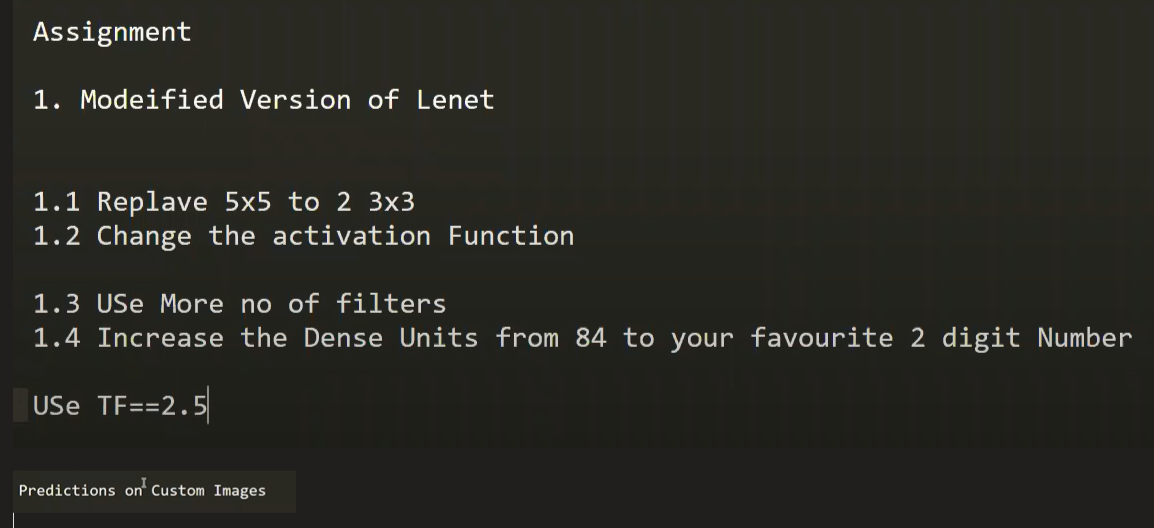

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.5.0


***Modified LeNet***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
 (x_train,y_train),(x_test,y_test) =  mnist.load_data()
 print(x_train.shape)
 print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)


In [ ]:
no_of_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=no_of_classes)
y_test = to_categorical(y_test,num_classes=no_of_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(3,3), padding = 'valid', activation= 'relu', input_shape = (28,28,1)))
model.add(Conv2D(6, kernel_size=(3,3), padding = 'valid', activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(16, kernel_size = (3,3),activation = 'relu',padding = 'valid'))
model.add(Conv2D(16, kernel_size = (3,3),activation = 'relu',padding = 'valid'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(120, kernel_size = (3,3),activation = 'relu',padding = 'valid'))
model.add(Conv2D(120, kernel_size = (2,2),activation = 'relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 6)         330       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        880       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 120)        

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [ ]:
checkpointer = ModelCheckpoint(filepath="model.weights.best.h5", save_best_only = True, verbose = 1)

hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size = 32, epochs = 15,verbose = 1 , callbacks = [checkpointer])

Epoch 1/15


UnknownError: ignored